%%HTML
<table style="width:100%">
    <tr>
    <td style="text-align:right"><a target="_blanc" href="http://www.irt-saintexupery.com/"></a><img src="http://www.irt-saintexupery.com/wp-content/uploads/2015/05/logo.jpg"> </td>
    <td style="text-align:left"><a target="_blanc" href="http://www.irt-saintexupery.com/"></a><img src="http://www.enseeiht.fr/skins/enseeiht-new/resources/img/logo-enseeiht.png"> </td>
     </tr>
</table>
<center><h1>Devloppement du robot TwIRTee</h1></center>
<p text-align="right">
<table>
    <tr>
    <td>Tuteur :<br>Auteur :</td>
    <td style="text-align:right">Eric JENN<br>Sami EZZEROUALI</td>
    </tr>
</table>
</p>


## Simulation du modèle de positionnement par trilatération

In [105]:
import matplotlib.pyplot as plt
from numpy import *
from math import pi


- La fonction anchorsPosition trace l'emplacement des beacons dans le cas de 4 émetteurs en positionnement carré [0,0] [0,1] [1,1] et [1,0]
##### TODO:	Rendre la fonction adaptable en nombre d'emetteurs, en suivant les methodes de placement évoqué dans "Roa et al. - 2007 - Optimal placement of sensors for trilateration Re"


In [106]:
def anchorsPosition(delta):
	_Xaux=[0,0,delta,delta]
	_Yaux=[0,delta,delta,0]
	_position=[_Xaux,_Yaux]
	return _position;

In [107]:
def drawCercles(vector,_R):
	teta=linspace(0,2*pi,720);
	cercles=[0,0]
	cx=[]
	cy=[]
	for k in range(len(vector[0])):
		for i in range(len(teta)):
			cx.append(vector[0][k]+_R[k]*sin(teta[i]))
			cy.append(vector[1][k]+_R[k]*cos(teta[i]))
	cercles=[cx,cy]
	return cercles

In [108]:
def robotMove():
	t=linspace(0,10,20)
	x=150*sin(t)+60*t+200
	y=100*t
	robot=[]
	robot.append(x)
	robot.append(y)
	return robot

In [109]:
def rightRayons(position,vector):
    ray=[]
    for i in range(len(vector[1])):
        xyanchor=array((0,0))
        xyanchor[0]=vector[0][i]
        xyanchor[1]=vector[1][i]
        ray.append(linalg.norm(xyanchor-position))
    return ray
print(linalg.norm([1100,5000]))
rightRayons([500,500],[[0, 0, 1000, 1000], [0, 1000, 1000, 0]])

5119.57029447


[707.10678118654755,
 707.10678118654755,
 707.10678118654755,
 707.10678118654755]

* ComputeXY() : this function must compute the coordinate of the robot according to Ray[] and anchorsVector

In [110]:
def computeXY(ray,anchorsVector):
	position=[0,0]
	_x=anchorsVector[0]
	_y=anchorsVector[1]
	A=[]
	for i in range(1,len(_x)):
		A.append([_x[i]-_x[0],_y[i]-_y[0]])
	b=[]
	for i in range(1,len(ray)):
		b.append(0.5*(ray[0]**2-ray[i]**2+(_x[i]-_x[0])**2+(_y[i]-_y[0])**2))
	return position


In [111]:
vector=anchorsPosition(1000)

#plt.show()

Ray=[500,500,1100,1100]
robot=robotMove()
computeXY(Ray,vector)
vector


[[0, 0, 1000, 1000], [0, 1000, 1000, 0]]

* 1er cas de figure :mesures parfaites

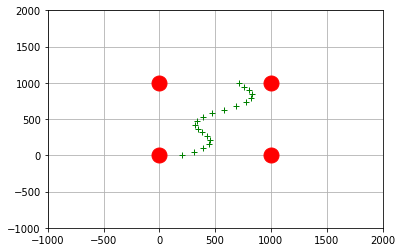

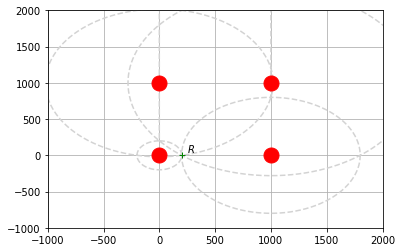

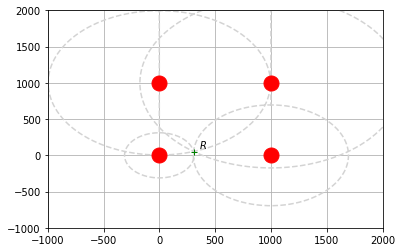

In [113]:

plt.figure(3)
plt.plot(vector[0],vector[1],"o",markersize=15,color="red")
plt.plot(robot[0],robot[1],"+",color="green")
plt.grid(True)
plt.ylim(-1000,2000)
plt.xlim(-1000,2000)
plt.show()


plt.figure(1)
position=[]
position.append(robot[0][0])
position.append(robot[1][0])
ray=rightRayons(position,vector)
cercles = drawCercles(vector,ray)

plt.plot(cercles[0],cercles[1],"--",color="LightGrey")
plt.text(robot[0][0]+50,robot[1][0]+50, r'$ R $')
plt.plot(vector[0],vector[1],"o",markersize=15,color="red")
plt.plot(robot[0][0],robot[1][0],"+",color="green")
plt.ylim(-1000,2000)
plt.xlim(-1000,2000)
plt.grid(True)

plt.figure(2)
position=[]
position.append(robot[0][1])
position.append(robot[1][1])
ray=rightRayons(position,vector)
cercles = drawCercles(vector,ray)
plt.plot(cercles[0],cercles[1],"--",color="LightGrey")
plt.text(robot[0][1]+50,robot[1][1]+50, r'$ R $')
plt.plot(vector[0],vector[1],"o",markersize=15,color="red")
plt.plot(robot[0][1],robot[1][1],"+",color="green")
plt.grid(True)
plt.ylim(-1000,2000)
plt.xlim(-1000,2000)
plt.show()